In [1]:
import altair as alt
import pandas as pd
import glob, os
import spacy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.readwrite import json_graph
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import row, column
from bokeh.io import  output_notebook
import nltk
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from itertools import combinations 

In [3]:

df = pd.read_csv('../data/matrix_data_ner_congo.csv')
df_1 = pd.read_csv('../data/matrix_data_ner_congo_unique.csv')
# test = df.loc[(df.year == 1960.0) & (df.source == 'belgian') & (df.target == 'belgian')]
# len(test)

In [4]:
df_grouped1 = df_1.groupby(['year', 'source', 'target']).size().reset_index()
df_grouped1.year = df_grouped1.year.astype(int)
# df_grouped['date'] = pd.to_datetime(df_grouped['year'].apply(str)+'-'+df_grouped['month_index'].apply(str) + '-01', format='%Y-%m-%d')
# df_grouped['string_date'] =df_grouped.date.dt.strftime('%Y-%m-%d')
df_grouped1.rename(columns={0: 'count'}, inplace=True)

In [5]:
# df['terms'] = df.source + '_' + df.target
df_grouped = df.groupby(['year', 'source', 'target']).size().reset_index()
# df_grouped['month_index'] = pd.to_datetime(df_grouped['month'], format='%B', errors='coerce').dt.month
df_grouped.year = df_grouped.year.astype(int)


# df_grouped['date'] = pd.to_datetime(df_grouped['year'].apply(str)+'-'+df_grouped['month_index'].apply(str) + '-01', format='%Y-%m-%d')
# df_grouped['string_date'] =df_grouped.date.dt.strftime('%Y-%m-%d')
df_grouped.rename(columns={0: 'count'}, inplace=True)

In [6]:
df_2 = df_grouped1
# term = 'patrice'
# t = df_1.loc[(df_1.source == term) | (df_1.target == term)]
# print(t)
terms = df_2.source.unique()
frames = []
for term in terms:
    ti = df_2.loc[(df_1.source == term) | (df_2.target == term)]
    print(len(ti))
    for i, r in ti.iterrows():
        d = {}
        d['source'] = term
        d['count'] = r['count']
        d['year'] = r.year
#         d['month'] = r.month
#         d['day'] = r.day
        if r.source != term:
            d['target'] = r.source
            
        else:
            d['target'] = r.target

        dm = pd.DataFrame().append(d, ignore_index=True)
        frames.append(dm)


        
        
dl2 = pd.concat(frames)
dm2 = dl2.groupby(['year', 'source', 'target'])['count'].sum().reset_index()


113
132
54
86
45
84
50
73
90


In [7]:
dx = dm2.groupby(['year', 'source'])['count'].sum().reset_index()
dx.year = dx.year.astype(int)
dx

,year,source,count
0,1960,belgian,1330.0
1,1960,congo,2002.0
2,1960,kasavubu,228.0
3,1960,katanga,790.0
4,1960,leopoldville,372.0
5,1960,lumumba,594.0
6,1960,mobutu,90.0
7,1960,patrice,168.0
8,1960,tshombe,334.0
9,1961,belgian,2184.0


In [8]:

pi = pd.pivot_table(dx, values='count', index=['source'], columns=['year'], fill_value=0, aggfunc=np.sum)
# # plt.pcolor(pi)
# # plt.yticks(np.arange(0.5, len(pi.index), 1), pi.index)
# # plt.xticks(np.arange(0.5, len(pi.columns), 1), pi.columns)
# ax = plt.axes()
# g = sns.heatmap(pi, ax=ax, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
# ax.set_title('Frequency of keyword co-occurence with each other across the corpus')

# # axes = g.axes.flatten()
# # axes[0].set_title('Correlation between Congo Crisis Keywords and Corpus Distributions over Time')
# ax.set_ylabel('keywords about the Congo Crisis')
# ax.set_xlabel('years')

# plt.savefig('congo_cooccurence_year.png')
# plt.show()

In [9]:
# alt.Chart(dx).mark_bar().encode(
#     x=alt.X('year:N', axis=alt.Axis(title='', labelAngle=0)),
#     y=alt.Y('count', axis=alt.Axis(title='')),
#     color='source'
# ).properties(
#     width=400,
#     title='Distribution of Congo Crisis Terms Co-occurence Together Over Corpus'
# )

In [10]:
df_1 = df_grouped
terms = df_1.source.unique()
frames = []
for term in terms:
    ti = df_1.loc[(df_1.source == term) | (df_1.target == term)]
    for i, r in ti.iterrows():
        d = {}
        d['source'] = term
        d['count'] = r['count']
        d['year'] = r.year
#         d['month'] = r.month
#         d['day'] = r.day
        if r.source != term:
            d['target'] = r.source
            
        else:
            d['target'] = r.target

        dm = pd.DataFrame().append(d, ignore_index=True)
        frames.append(dm)


        
        
dl = pd.concat(frames)
dm = dl.groupby(['year', 'source', 'target'])['count'].sum().reset_index()
# term = 'patrice'
# t = df_1.loc[(df_1.source == term) | (df_1.target == term)]
# print(t)
# frames = []
# for i, r in t.iterrows():
#     d = {}
#     d['count'] = r['count']
#     d['year'] = r.year
#     if r.source != term:
#         d['term'] = r.source

#     else:
#         d['term'] = r.target
        
#     dm = pd.DataFrame().append(d, ignore_index=True)
#     frames.append(dm)


        
        
# dl = pd.concat(frames)
# df = dl.groupby(['year', 'term'])['count'].sum().reset_index()


In [11]:
test = pd.melt(dm, id_vars=['year', 'count'])


In [12]:

# g = sns.lmplot(x="year", y="count",
#            col="source", data=dx, col_wrap=3, height=3);
# g.axes.flatten()
# axes[0].set_title('Correlation between Congo Crisis Keywords and Corpus Distributions over Time Per Term')

# # g.savefig('congo_terms.png')

In [13]:
term1 = 'patrice'
term2 = 'mobutu'

da = dm.loc[(dm.source == term1) &  (dm.target == term2) |(dm.source == term2) &  (dm.target == term1) ]
# g = sns.lmplot(x="year", y="count",
#            col="source", data=da, col_wrap=3, height=3);
t = da.drop_duplicates(subset=['year', 'count'], keep='first')
# g = sns.lmplot(x="year", y="count", data=t);

In [14]:
terms = ['patrice','congo','lumumba','tshombe','leopoldville','belgian','mobutu','kasavubu','katanga']
# for i,t in enumerate(terms):
#     if i+1< len(terms):
#         print(t, terms[i+1])
combos = list(combinations(terms, 2)) 
frames = []
for c in combos:
    term1, term2 = c
    da = dm.loc[(dm.source == term1) &  (dm.target == term2) |(dm.source == term2) &  (dm.target == term1) ]
    da['terms'] = da['source'] +'_'+da['target']
    t = da.drop_duplicates(subset=['year', 'count'], keep='first')
    frames.append(t)
all_combos = pd.concat(frames)

In [15]:
terms = ['patrice','congo','lumumba','tshombe','leopoldville','belgian','mobutu','kasavubu','katanga']
# for i,t in enumerate(terms):
#     if i+1< len(terms):
#         print(t, terms[i+1])
combos = list(combinations(terms, 2)) 
frames = []
for c in combos:
    term1, term2 = c
    da = dm2.loc[(dm2.source == term1) &  (dm2.target == term2) |(dm2.source == term2) &  (dm2.target == term1) ]
    da['terms'] = da['source'] +'_'+da['target']
    t = da.drop_duplicates(subset=['year', 'count'], keep='first')
    frames.append(t)
all_combos2 = pd.concat(frames)

In [16]:
all_combos2

,year,source,target,count,terms
16,1960.0,congo,patrice,86.0,congo_patrice
62,1960.0,patrice,congo,34.0,patrice_congo
95,1961.0,congo,patrice,270.0,congo_patrice
143,1961.0,patrice,congo,360.0,patrice_congo
176,1962.0,congo,patrice,158.0,congo_patrice
216,1962.0,patrice,congo,72.0,patrice_congo
240,1963.0,congo,patrice,10.0,congo_patrice
290,1964.0,congo,patrice,48.0,congo_patrice
338,1965.0,congo,patrice,38.0,congo_patrice
390,1966.0,congo,patrice,8.0,congo_patrice


In [17]:
sum_combos =all_combos2.groupby(['year','terms'])['count'].sum().reset_index()
sum_combos = sum_combos.sort_values(by=['count'])
# order = sum_combos.terms.tolist()
# all_combos['terms_cat'] = pd.Categorical(
#     all_combos['terms'], 
#     categories=order, 
#     ordered=True
# )
# all_combos = all_combos.sort_values(by=['terms_cat'])
sum_combos
# all_combos.to_csv('terms_joyplot.csv')

,year,terms,count
186,1962.0,mobutu_katanga,2.0
354,1966.0,katanga_leopoldville,2.0
355,1966.0,katanga_lumumba,2.0
235,1963.0,mobutu_kasavubu,2.0
147,1962.0,belgian_mobutu,2.0
277,1964.0,mobutu_kasavubu,2.0
359,1966.0,leopoldville_patrice,2.0
323,1965.0,mobutu_kasavubu,2.0
229,1963.0,leopoldville_patrice,2.0
205,1963.0,belgian_kasavubu,2.0


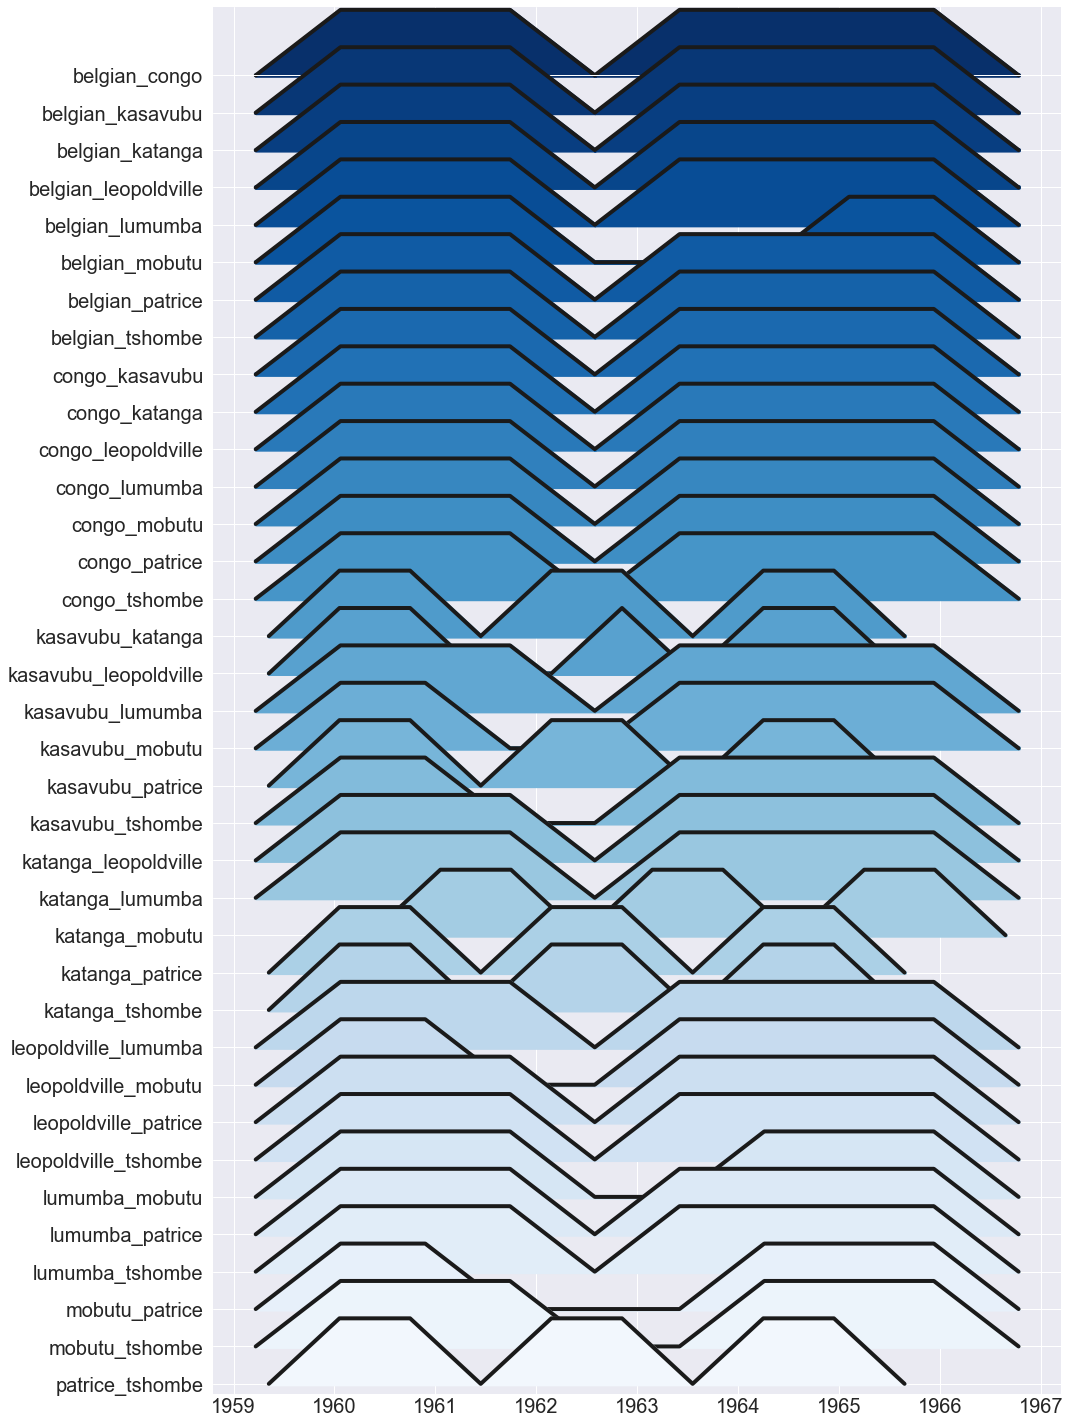

In [18]:
import joypy
from matplotlib import cm
%matplotlib inline

fig, axes = joypy.joyplot(all_combos, by='terms', column='year', kind='counts', range_style='own', figsize=(15,20), grid='both', overlap=1, ylabelsize=20, xlabelsize=20, colormap=cm.Blues_r, linewidth=4)

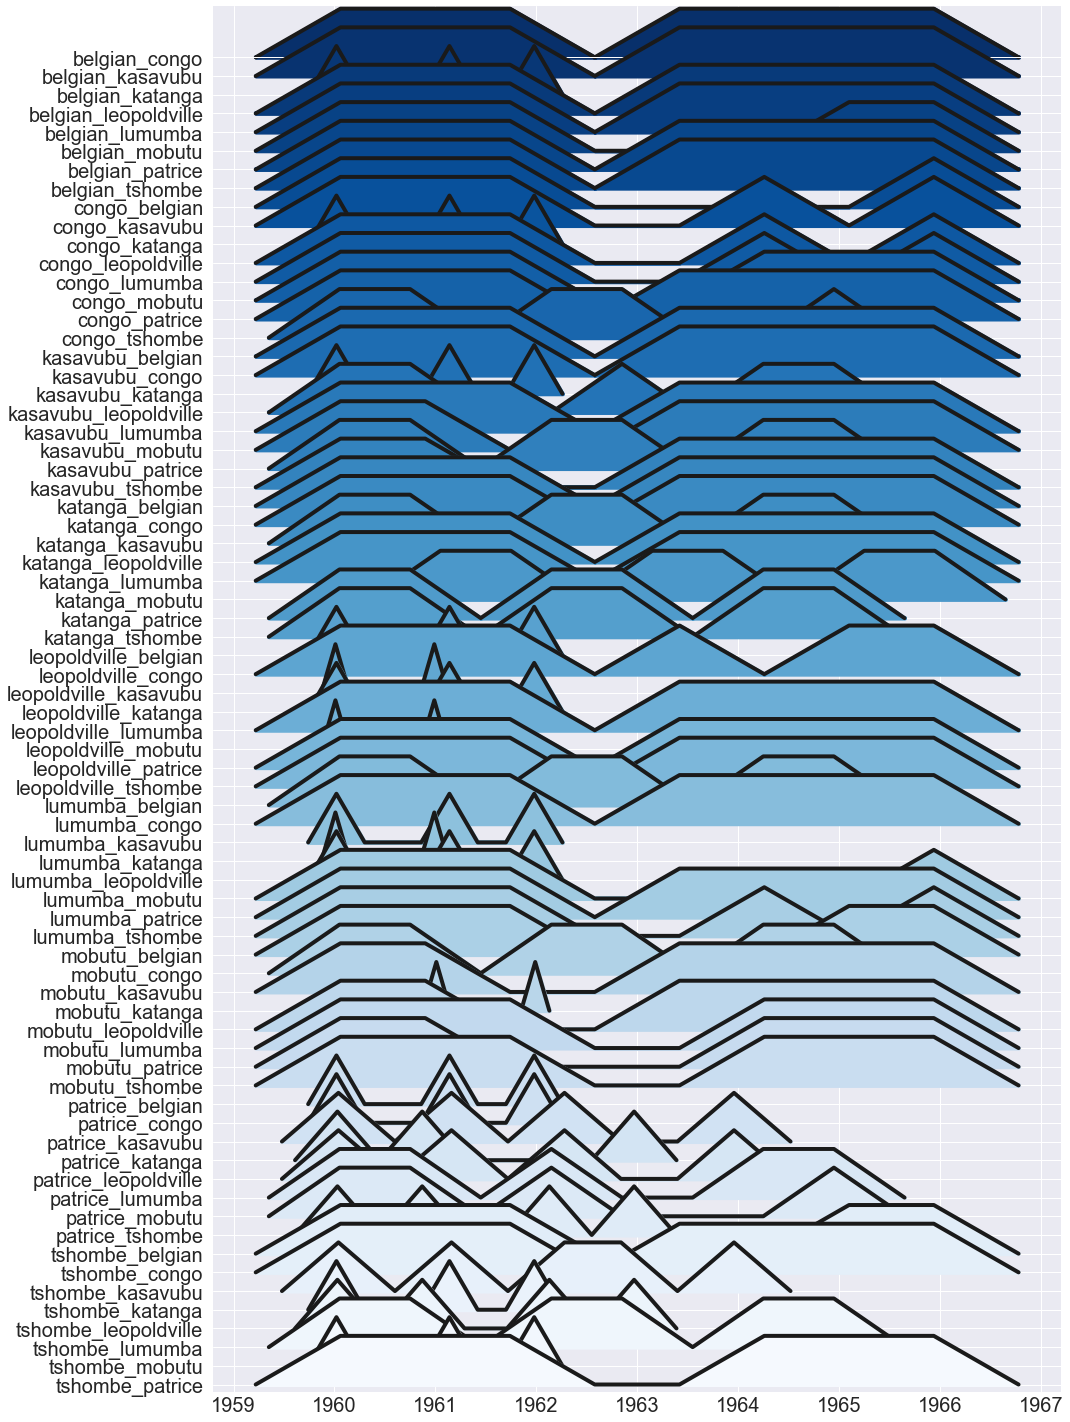

In [19]:
# fig.savefig('joyplot.png')
%matplotlib inline

fig, axes = joypy.joyplot(all_combos2, by='terms', column='year', kind='counts', range_style='own', figsize=(15,20), grid='both', overlap=1, ylabelsize=20, xlabelsize=20, colormap=cm.Blues_r, linewidth=4)

In [20]:
all_combos.year = all_combos.year.astype(int)
pi_combos = pd.pivot_table(all_combos, values='count', index=['terms'], columns=['year'], fill_value=0, aggfunc=np.sum)
pi_combos.reset_index(inplace=True)

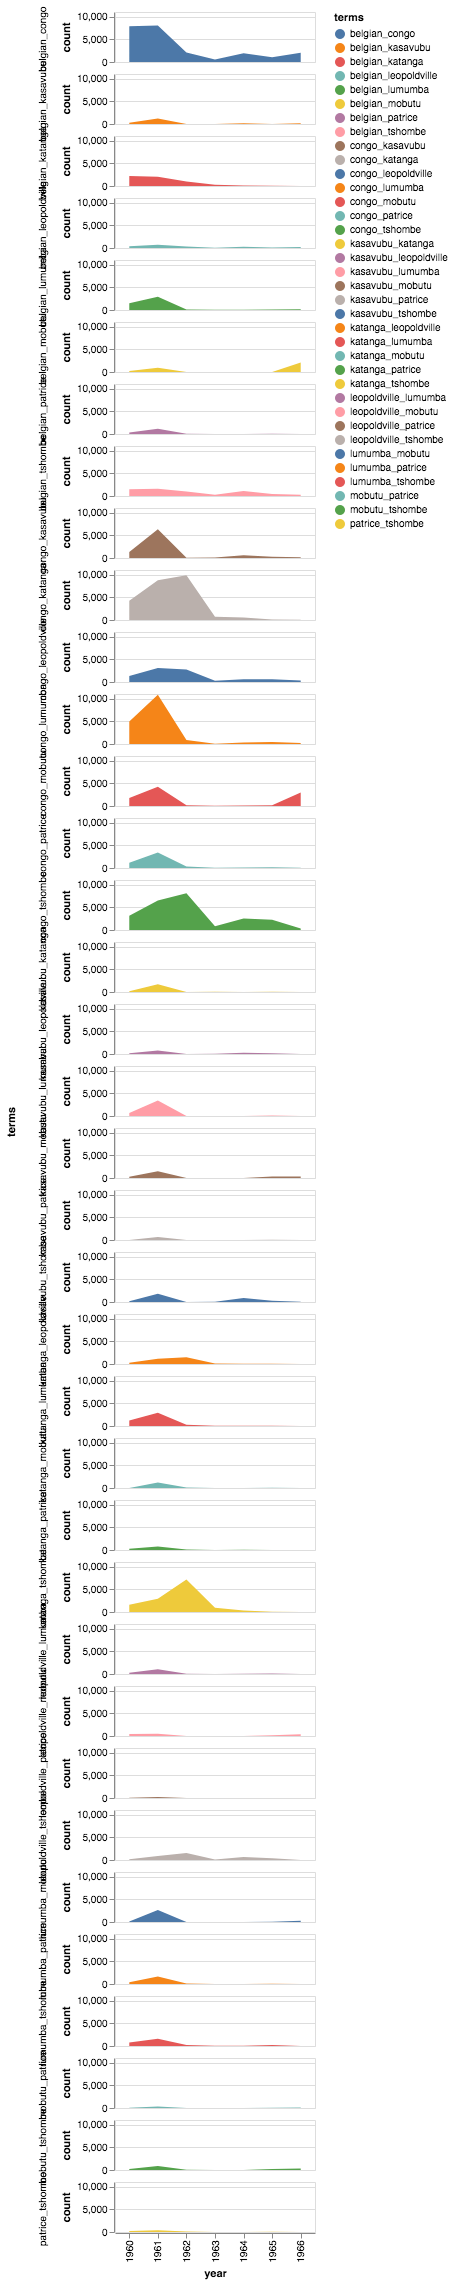

In [21]:
alt.Chart(all_combos).mark_area().encode(
    x='year:N',
    y='count',
    color='terms',
#     size='count',
    row=alt.Row('terms:N'
    )
).properties(height=50, width=200)

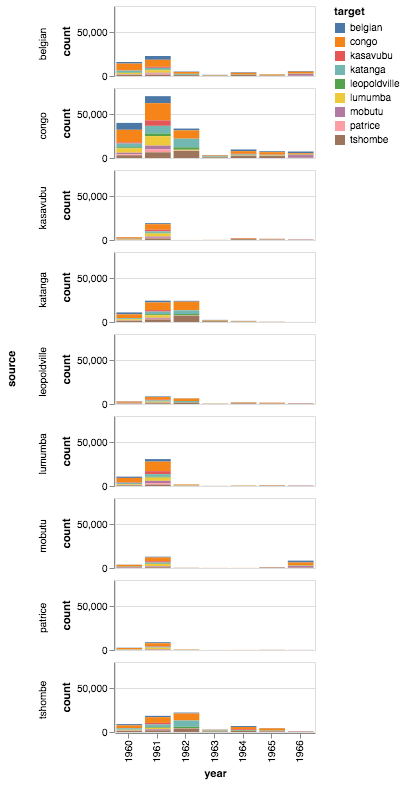

In [22]:
alt.Chart(dm).mark_bar().encode(
    x='year:N',
    y='count',
    color='target',
#     size='count',
    row=alt.Row('source:N'
    )
).properties(height=70, width=200)
# alt.Chart(df).mark_line(point=True).encode(
#     x='year:N',
#     y='count:Q',
#     color=alt.Color('target:N', scale=alt.Scale(scheme='category10')),
#     detail='source:N',
#     opacity=alt.value(0.5)
# ).properties(width=500, height=1000)

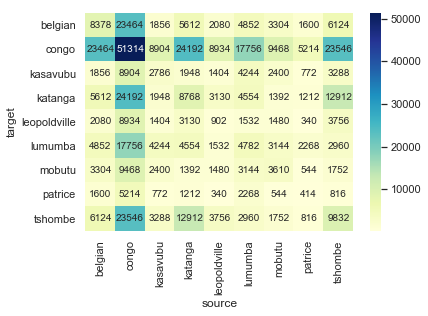

In [23]:
pi = pd.pivot_table(dm, values='count', index=['target'], columns=['source'], fill_value=0, aggfunc=np.sum)
# plt.pcolor(pi)
# plt.yticks(np.arange(0.5, len(pi.index), 1), pi.index)
# plt.xticks(np.arange(0.5, len(pi.columns), 1), pi.columns)
g = sns.heatmap(pi, cmap="YlGnBu", annot=True, fmt="d")
plt.show()

In [24]:
years = df.year.unique()
for y in years:
    t = df.loc[df.year == y]
# #     ax = plt.axes()
#     g = nx.from_pandas_edgelist(t)
#     den = nx.density(g)
#     dh = nx.degree_histogram(g)
#     print(den, dh)
        pi = pd.pivot_table(t, values='count', index=['target'], columns=['source'], fill_value=0, aggfunc=np.sum)
        sns.heatmap(pi, cmap="YlGnBu", ax=ax, annot=True, fmt="d")
        ax.set_title(y)
        plt.show()

IndentationError: unexpected indent (<ipython-input-24-ba331c86fe25>, line 9)

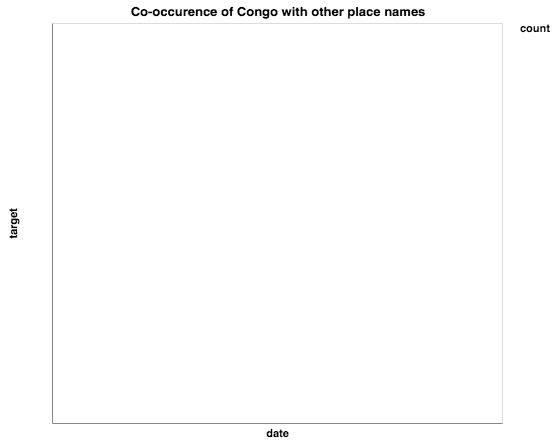

In [25]:
data = df_1.loc[(df_1.source == 'lumumba')]
alt.Chart(data).mark_circle(
    opacity=0.8,
    stroke='black',
    strokeWidth=1
).encode(
    alt.X('date:T'),
    alt.Y('target', axis=alt.Axis(labelAngle=0)),
    alt.Size('count',
        scale=alt.Scale(range=[0, 2000]),
        legend=alt.Legend(title='count')
    ),
    alt.Color('target', scale=alt.Scale(scheme='category20'), legend=None)
).properties(
    width=450,
    height=400,
    title='Co-occurence of Congo with other place names'
)

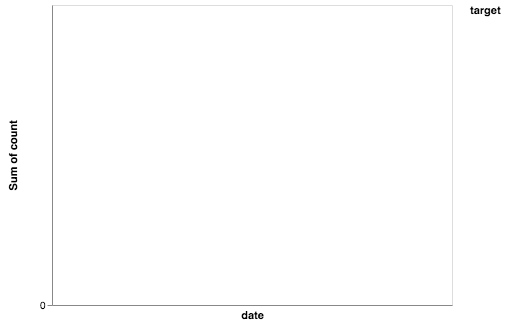

In [26]:
alt.Chart(data).mark_bar().encode(
    x='date:T',
    y='sum(count)',
    color='target'
)

In [331]:
corr= data.corr()
corr.style.background_gradient().set_precision(2)

,year,pn,count,month_index
year,1,0.74,0.1,-0.22
pn,0.74,1,0.071,-0.16
count,0.1,0.071,1,-0.02
month_index,-0.22,-0.16,-0.02,1


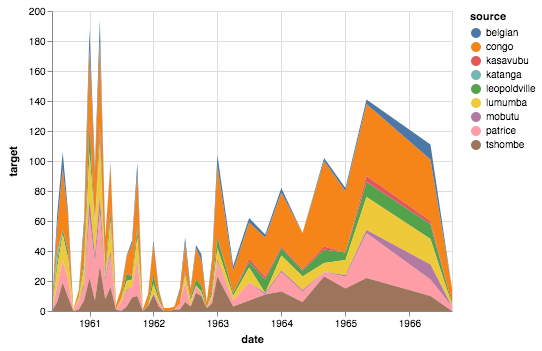

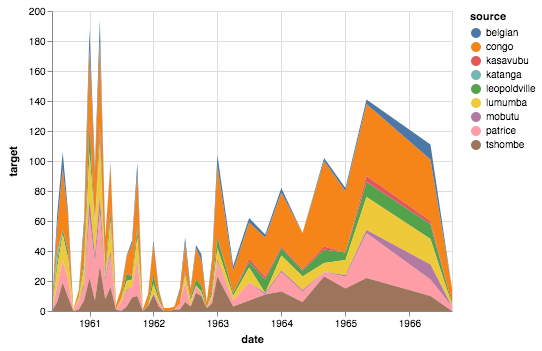

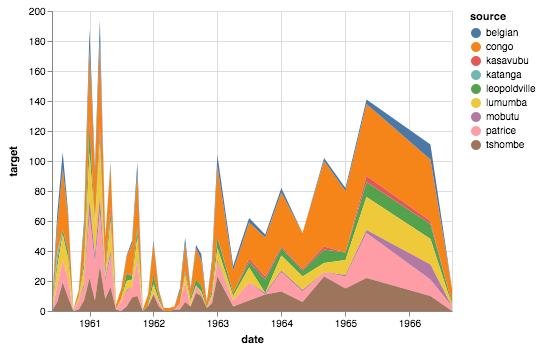

In [422]:
df_2 = df_1.groupby(['date', 'source'])['target'].size().reset_index()
alt.Chart(df_2).mark_area().encode(
    x="date:T",
    y=alt.Y("target:Q"),
    color="source:N"
)


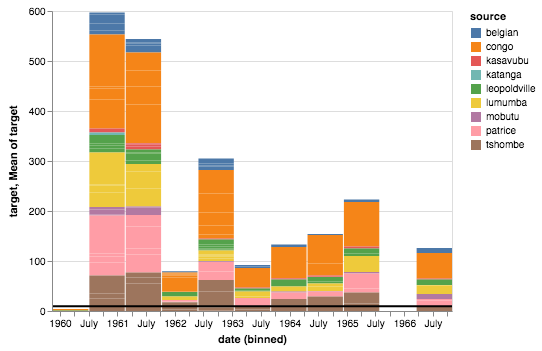

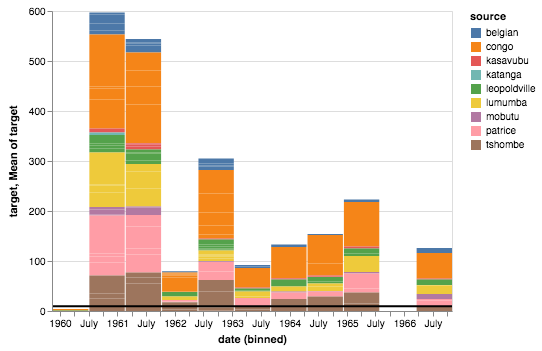

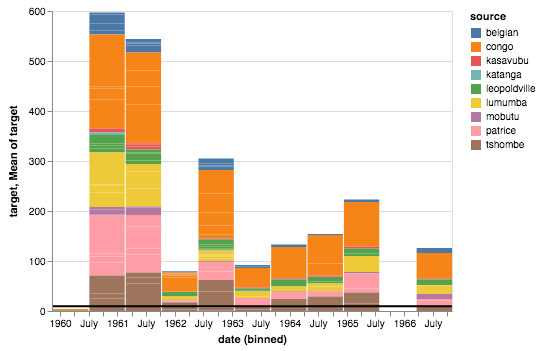

In [441]:
bar = alt.Chart(df_2).mark_bar().encode(
    x=alt.X("date:T", bin=True),
    y=alt.Y("target:Q"),
    color="source:N"
)
rule = alt.Chart(df_2).mark_rule(color='black').encode(
    y='mean(target):Q',
    size=alt.value(2)
)

bar + rule

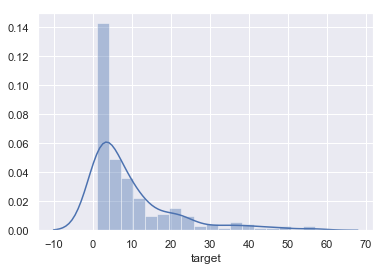

In [357]:
import seaborn as sns
sns.distplot(df_2.target,);

In [124]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_model = CountVectorizer(ngram_range=(1,2)) # default unigram model
# X = count_model.fit_transform(matrix)
# Xc = (X.T * X)
# # Xc.setdiag(0)
# vocab = count_model.vocabulary_
# vocab2 = {y:x for x,y in vocab.items()}

# G = nx.from_scipy_sparse_matrix(Xc)
# H = nx.relabel_nodes(G, vocab2)
# data = json_graph.node_link_data(H)
# T = json_graph.node_link_graph(data)
# ns = list(T.nodes)
# es = list(T.edges)
# final_nodes = []
# for n in G.nodes:
#     nod = {'name': ns[n], 'id':n}
#     final_nodes.append(nod)

# N = len(T.nodes)
# counts = np.zeros((N, N))
# for e in G.edges(data=True):
#     source, target, w = e
#     counts[[source], [target]] = w['weight']
#     counts[[target], [source]] = w['weight']
# print(len(counts))
# output_notebook()
# nodes = final_nodes
# list_nodes = ns
# xname = []
# yname = []
# color = []
# alpha = []
# #     colormap = ["#444444", "#a6cee3", "#1f78b4", "#b2df8a", "#33a02c", "#fb9a99","#e31a1c", "#fdbf6f", "#ff7f00", "#cab2d6", "#6a3d9a"]
# for i, node1 in enumerate(nodes):
#     for j, node2 in enumerate(nodes):
#         xname.append(node1['name'])
#         yname.append(node2['name'])

#         alpha.append(min(counts[i,j]/4.0, 0.9) + 0.1)

# for i in range(len(xname)):
#     al = alpha[i]
#     if  al == 0.35:
#         color.append('#ce93d8')
#     elif al == 0.6:
#         color.append('#ba68c8')
#     elif al == 0.85:
#         color.append('#9c27b0')
#     elif al == 1.0:
#         color.append('#7b1fa2')
#     else:
#         color.append('lightgrey')

# source = ColumnDataSource(data=dict(
#     xname=xname,
#     yname=yname,
#     colors=color,
#     alphas=alpha,
#     count=counts.flatten(),
# ))

# print(source)

# p = figure(title='test',
#            x_axis_location="above", tools="hover,save",
#            x_range=list(reversed(list_nodes)), y_range=list_nodes)

# p.plot_width = 600
# p.plot_height = 600
# p.grid.grid_line_color = None
# p.axis.axis_line_color = None
# p.axis.major_tick_line_color = None
# p.axis.major_label_text_font_size = "5pt"
# p.axis.major_label_standoff = 0
# p.xaxis.major_label_orientation = np.pi/3

# p.rect('xname', 'yname', 0.9, 0.9, source=source,
#        color='colors', alpha='alphas', line_color=None,
#        hover_line_color='black', hover_color='colors')

# p.select_one(HoverTool).tooltips = [
#     ('names', '@yname, @xname'),
#     ('count', '@count'),
# ]
# print(p)

ColumnDataSource(id='c279fa77-c225-4966-9d59-dbf691a92466', ...)
Figure(id='26b4df37-ce6d-4190-a791-e03ca8b8c74d', ...)
